In [47]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import konlpy
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
##################한글깨짐방지##################
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system()=="Windows":

    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

    rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus']=False


import warnings

warnings.filterwarnings("ignore")
############################################

In [49]:
driver = webdriver.Chrome()
url = "https://ko.wikipedia.org/wiki/J._%EB%A1%9C%EB%B2%84%ED%8A%B8_%EC%98%A4%ED%8E%9C%ED%95%98%EC%9D%B4%EB%A8%B8"
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")
soup

<html class="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled vector-animations-ready ve-available" dir="ltr" lang="ko"><head>
<meta charset="utf-8"/>
<title>J. 로버트 오펜하이머 - 위키백과, 우리 모두의 백과사전</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-w

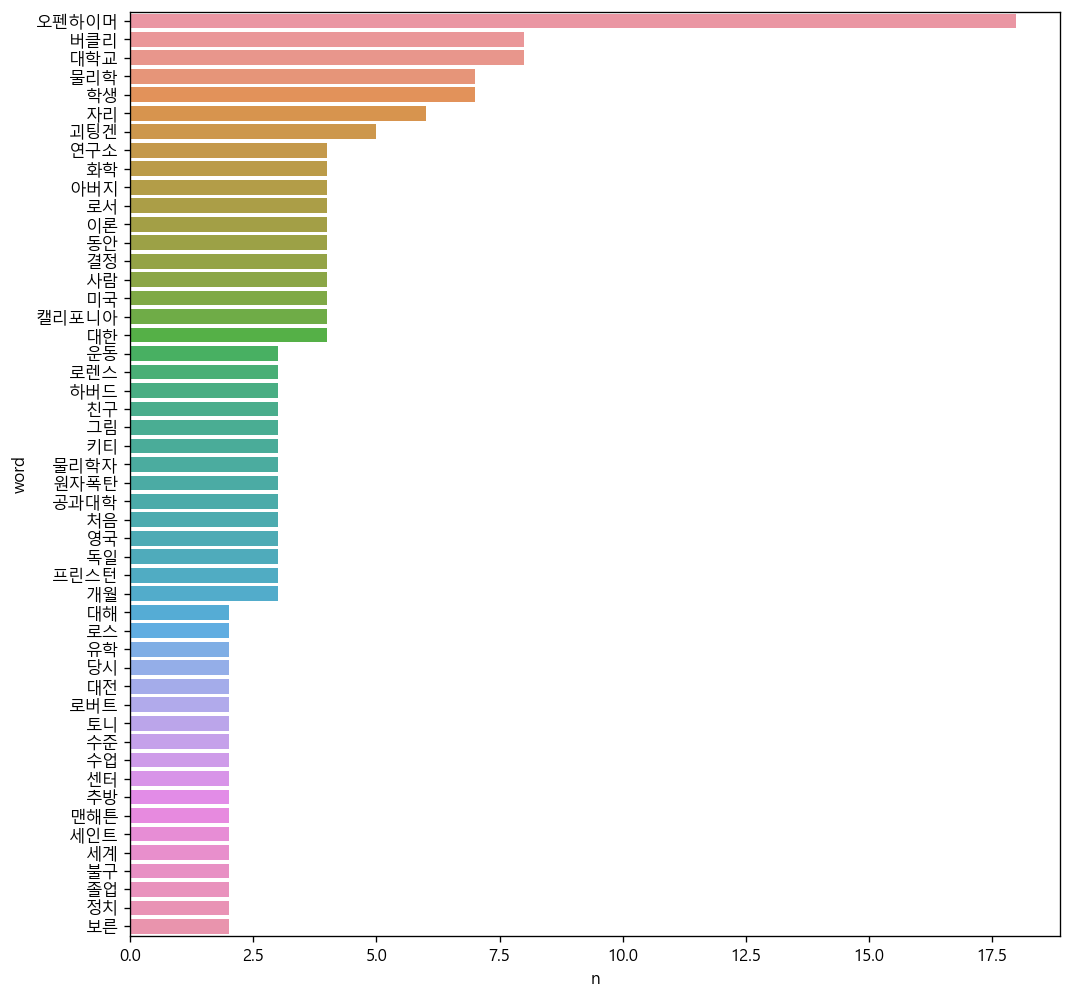

In [52]:
wiki_word_list = soup.select("div > div > p")
wiki_word_every = []
for i in wiki_word_list:
    result1 = i.text.strip()
    wiki_word_every.append(result1)
    
wiki_word_every2 = "".join(wiki_word_every)
wiki_word_every21 = re.sub(r'\[[0-9]+\]', '', wiki_word_every2) 
wiki_word_every3 = re.sub('[^\w\d]', ' ', wiki_word_every21) # 한글을 제외한 나머지를 전부 공백문자로 바꾸라는 이야기이다.
okt = konlpy.tag.Okt()
nouns = okt.nouns(wiki_word_every3)
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
top20 = df_word.head(50)
sns.barplot(data = top20, y = 'word', x = 'n')
plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [10, 2]})        # 가로 세로 크기 설정

In [39]:
wiki_word_every2 = "".join(wiki_word_every)
wiki_word_every21 = re.sub(r'\[[0-9]+\]', '', wiki_word_every2) 
wiki_word_every3 = re.sub('[^\w\d]', ' ', wiki_word_every21) # 한글을 제외한 나머지를 전부 공백문자로 바꾸라는 이야기이다.
okt = konlpy.tag.Okt()
nouns = okt.nouns(wiki_word_every3)
df_word = pd.DataFrame({'word' : nouns})
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word.sort_values('count')
df_word = df_word.groupby('word',as_index=False).agg(n=('word','count')).sort_values('n',ascending=False)
top20 = df_word.head(50)
sns.barplot(data = top20, y = 'word', x = 'n')
plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [10, 2]})        # 가로 세로 크기 설정

,word,n
245,오펜하이머,18
135,버클리,8
78,대학교,8
119,물리학,7
376,학생,7
280,자리,6
35,괴팅겐,5
237,연구소,4
396,화학,4
212,아버지,4


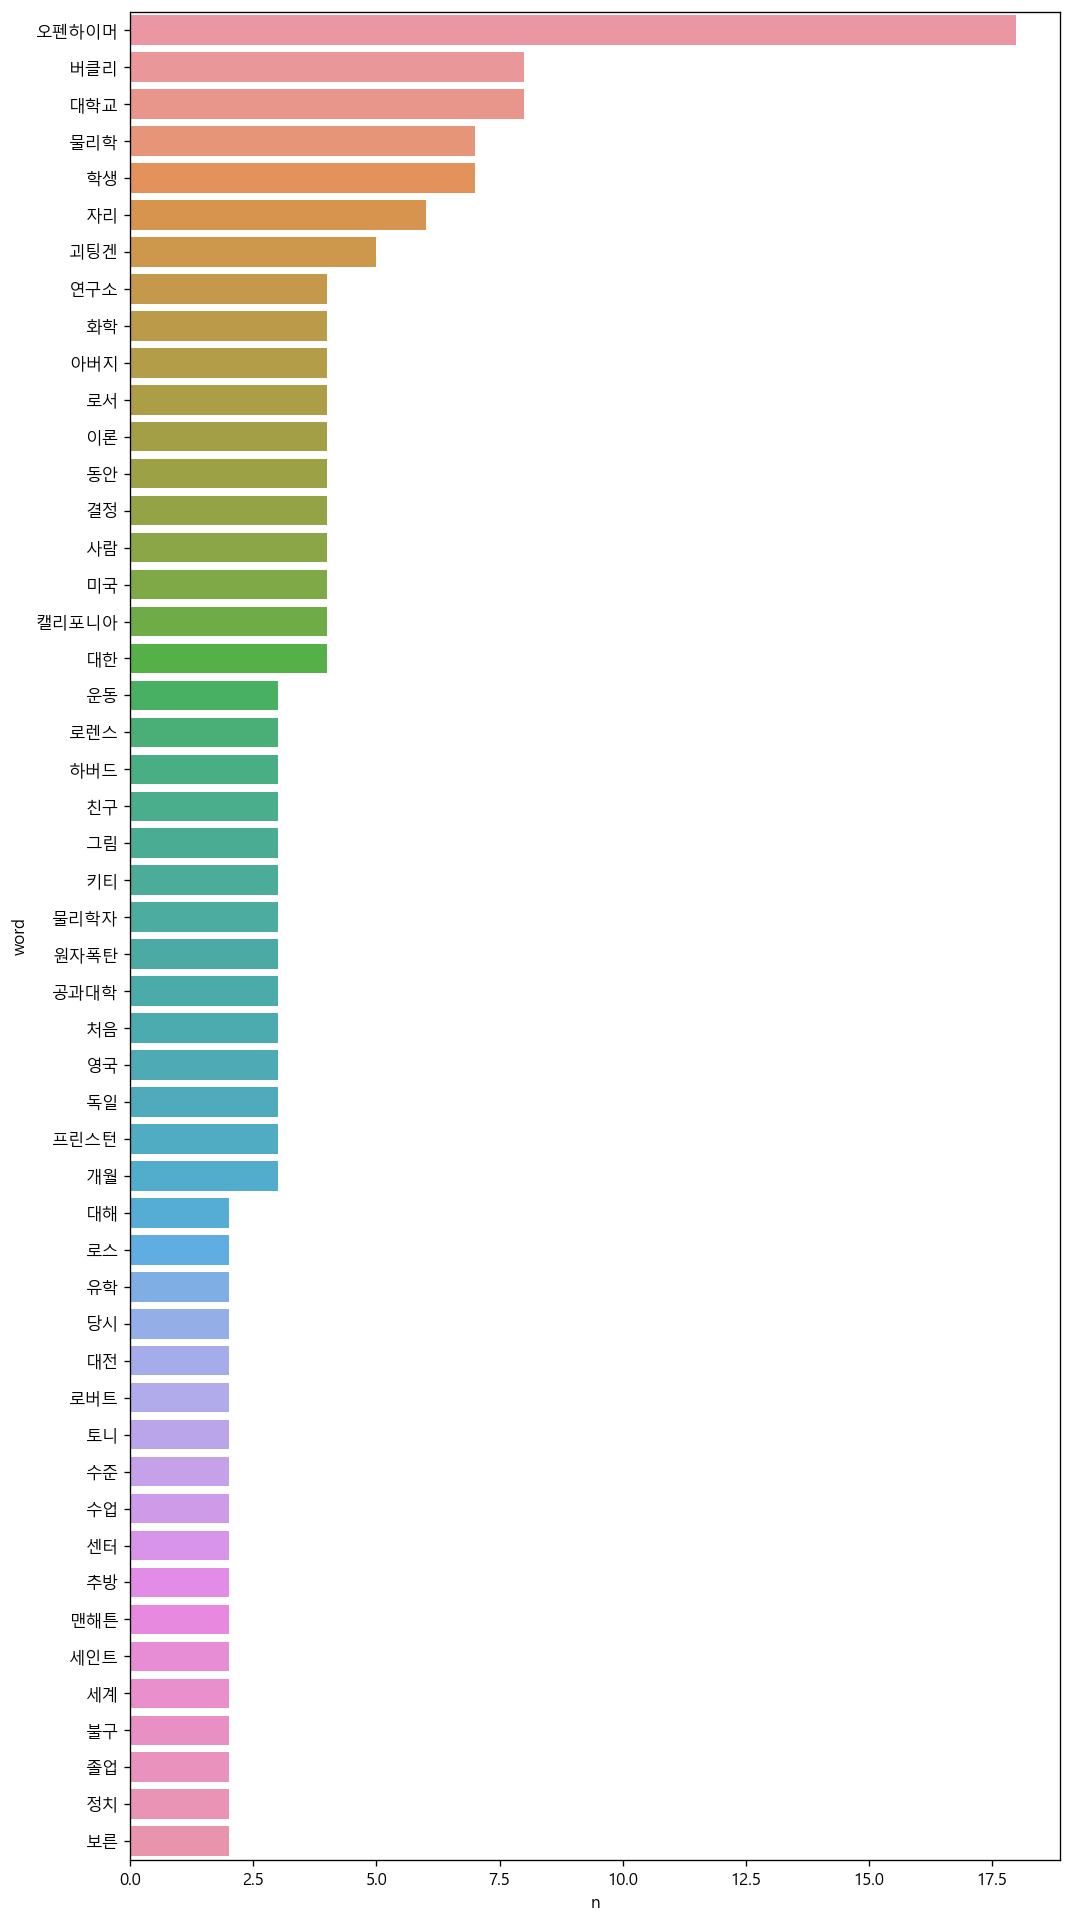

In [46]:
sns.barplot(data = top20, y = 'word', x = 'n')
plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [10, 2]})        # 가로 세로 크기 설정

In [61]:
hyong_young = okt.pos(wiki_word_every3)
hyong_young_sa = []
for i,j in hyong_young:
    if j == "Adjective":
        hyong_young_sa.append(i)
hyong_young_sa 


['유명하다',
 '부유한',
 '튼튼한',
 '없었지만',
 '있었다',
 '뛰어나지만',
 '없다시피',
 '분명하지',
 '붉히며',
 '있기를',
 '좋아했다',
 '있을',
 '있었다',
 '있었으나',
 '적응하기는',
 '힘들었다',
 '있었다고',
 '있던',
 '젊은',
 '있었다',
 '확고한',
 '좋지',
 '있다',
 '급속하게',
 '풍부하고',
 '새로운',
 '있었다',
 '많은',
 '원해서',
 '아팠다고',
 '있다',
 '있다',
 '가냘퍼서',
 '없었다고',
 '있지',
 '있는',
 '있었다고',
 '있었다',
 '아니라',
 '다른데도',
 '있었다',
 '충분히',
 '미',
 '있는',
 '무지했었다',
 '휩쓴',
 '없이는',
 '불가능했을',
 '아니었다는',
 '다양하다',
 '좋은',
 '아름다',
 '높은',
 '있었다',
 '아니라',
 '있던',
 '높은',
 '있는',
 '모호한',
 '있는',
 '그랬던',
 '있었다',
 '간략한',
 '의해',
 '있는',
 '오래된',
 '인해',
 '가깝게',
 '인해',
 '있다']

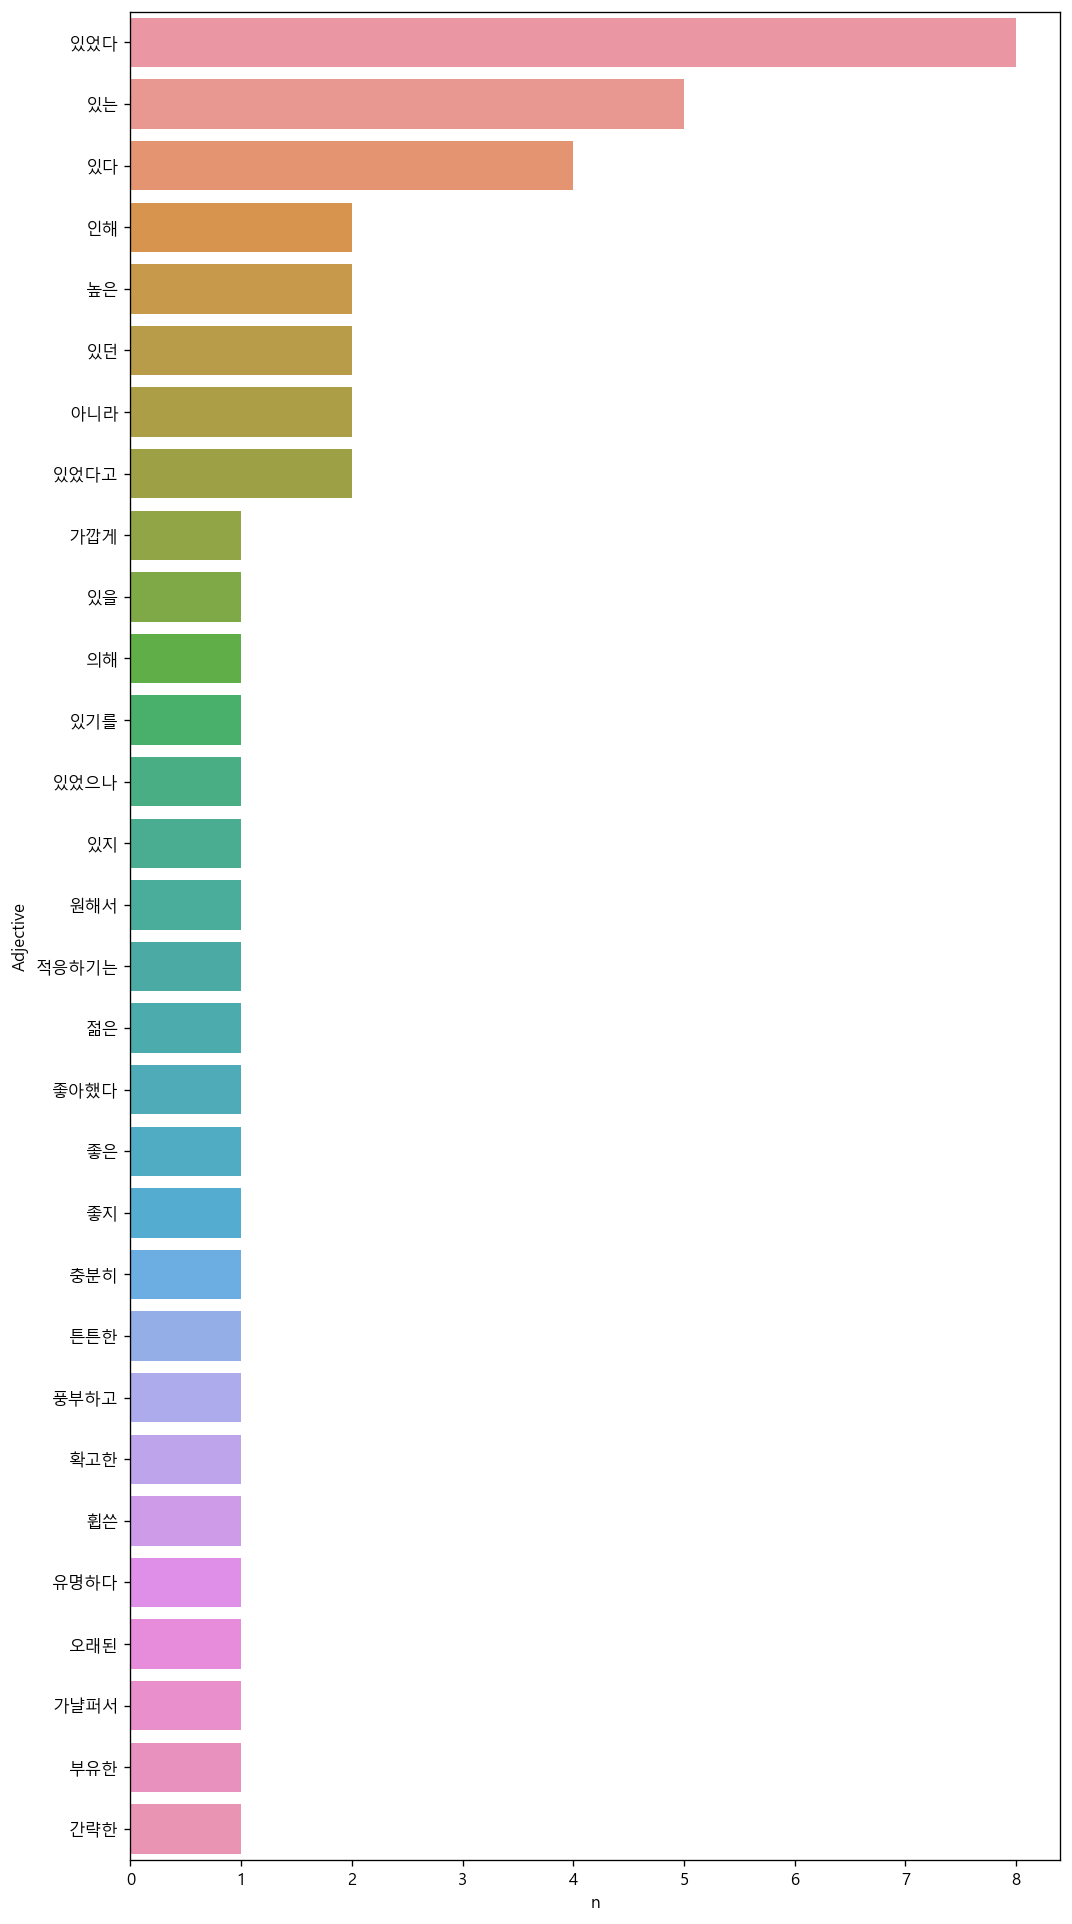

In [65]:
df_word2 = pd.DataFrame({'Adjective' : hyong_young_sa})
df_word2['count'] = df_word2['Adjective'].str.len()
df_word2 = df_word2.query('count >= 2')
df_word2.sort_values('count')
df_word2 = df_word2.groupby('Adjective',as_index=False).agg(n=('Adjective','count')).sort_values('n',ascending=False)
top30 = df_word2.head(30)
sns.barplot(data = top30, y = 'Adjective', x = 'n')
plt.rcParams.update({'font.family'    : 'Malgun Gothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [10, 2]})        # 가로 세로 크기 설정